# Covid-19 Cases Prediction for December 2020
#### Done by : Yazan Alhroob

### The Data used for this analysis is John Hopkin's University CSSE Time Series Covid-19 daily updated dataset
### Link to the data ([here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data))

## Links to subjects in this notebook
### A. World cases analysis and predection
[Libraries importing and data raeding](#1.-Libraries-importing-and-data-raeding)

[Data Manipulation](#2.-Data-Manipulation)

[Plotting](#3.-Plotting)

[Data Preprocessing](#4.-Data-Preprocessing)

[Linear Regression](#5.-Linear-Regression)

[Support Vector Regressor using "RBF" kernel](#6.-Support-Vector-Regressor-using-RBF-kernel)

[Support Vector Regressor with "poly" kernel](#7.-Support-Vector-Regressor-using-poly-kernel)

[Showing predictions for December](#8.-Showing-predictions-for-December)

### B. Jordan cases analysis and predection

[Data Manipulation](#1.-Data-Manipulation)

[Plotting](#2.-Plotting)

[Data Preprocessing](#3.-Data-Preprocessing)

[Linear Regression](#4.-Linear-Regression)

[Support Vector Regressor using "RBF" kernel](#5.-Support-Vector-Regressor-using-RBF-kernel)


[Showing predictions for December](#6.-Showing-predictions-for-December)



### Conclusion: 
[Conclusion](#Conclusion)

## A. World cases analysis and predection

### 1. Libraries importing and data raeding

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,40833,40937,41032,41145,41268,41334,41425,41501,41633,41728
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,19157,19445,19729,20040,20315,20634,20875,21202,21523,21904
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,56143,56419,56706,57026,57332,57651,57942,58272,58574,58979
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4038,4325,4410,4517,4567,4665,4756,4825,4888,4910
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,9381,9644,9871,10074,10269,10558,10805,11035,11228,11577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,50442,50952,51528,51948,52571,53075,53520,54060,54775,55408
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2060,2060,2060,2061,2062,2062,2063,2063,2063,2063
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16117,16200,16243,16285,16325,16415,16432,16480,16543,16661


### 2. Data Manipulation

#### Getting the total number of cases around the world every day

In [3]:
World = pd.DataFrame(df.groupby('Country/Region').sum().sum()[2:].reset_index())

#### Renaming the columns of the dataframe to (Date, Total_Cases)

In [4]:
World.columns = ['Date','Total_Cases']
World

,Date,Total_Cases
0,1/22/20,555.0
1,1/23/20,654.0
2,1/24/20,941.0
3,1/25/20,1434.0
4,1/26/20,2118.0
...,...,...
282,10/30/20,45594203.0
283,10/31/20,46070822.0
284,11/1/20,46502095.0
285,11/2/20,46959365.0


##### #So, we can see that the data recorded from January 22th 2020 until November  3rd  2020 (287 Days)

#### Converting the Date column to datetime type

In [5]:
World.Date = pd.to_datetime(World.Date)

#### Getting the daily cases

In [6]:
World['Daily_Cases'] = World['Total_Cases'].diff()
World['Daily_Cases'].fillna(0, inplace=True)
World

,Date,Total_Cases,Daily_Cases
0,2020-01-22,555.0,0.0
1,2020-01-23,654.0,99.0
2,2020-01-24,941.0,287.0
3,2020-01-25,1434.0,493.0
4,2020-01-26,2118.0,684.0
...,...,...,...
282,2020-10-30,45594203.0,570759.0
283,2020-10-31,46070822.0,476619.0
284,2020-11-01,46502095.0,431273.0
285,2020-11-02,46959365.0,457270.0


#### Getting the month as new column from Date column

In [7]:
World['Month'] = World['Date'].astype('str').str[5:7]
World['Month'] = World['Month'].astype('int32')
World

,Date,Total_Cases,Daily_Cases,Month
0,2020-01-22,555.0,0.0,1
1,2020-01-23,654.0,99.0,1
2,2020-01-24,941.0,287.0,1
3,2020-01-25,1434.0,493.0,1
4,2020-01-26,2118.0,684.0,1
...,...,...,...,...
282,2020-10-30,45594203.0,570759.0,10
283,2020-10-31,46070822.0,476619.0,10
284,2020-11-01,46502095.0,431273.0,11
285,2020-11-02,46959365.0,457270.0,11


### 3. Plotting

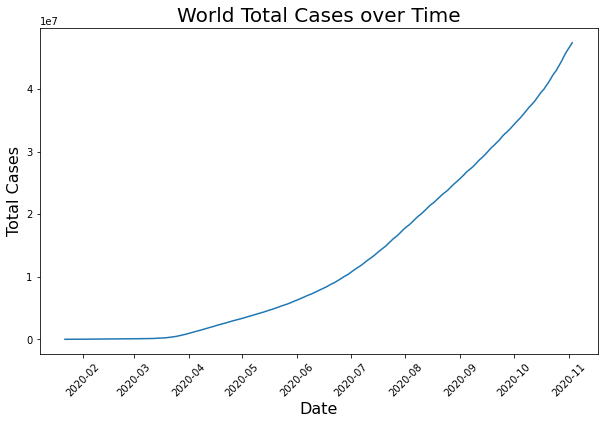

In [8]:
plt.figure(figsize=(10,6))
plt.plot(World.Date, World.Total_Cases)
plt.xticks(rotation=45)
plt.xlabel('Date',fontdict={'fontsize':16})
plt.ylabel('Total Cases',fontdict={'fontsize':16})
plt.title('World Total Cases over Time',fontdict={'fontsize':20})
plt.show()

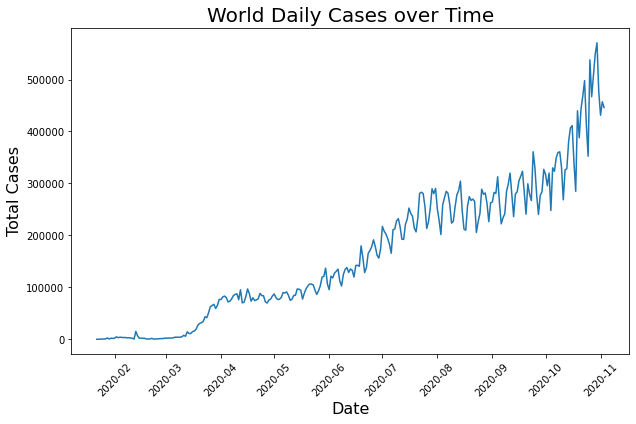

In [9]:
plt.figure(figsize=(10,6))
plt.plot(World.Date, World.Daily_Cases)
plt.xticks(rotation=45)
plt.xlabel('Date',fontdict={'fontsize':16})
plt.ylabel('Total Cases',fontdict={'fontsize':16})
plt.title('World Daily Cases over Time',fontdict={'fontsize':20})
plt.show()

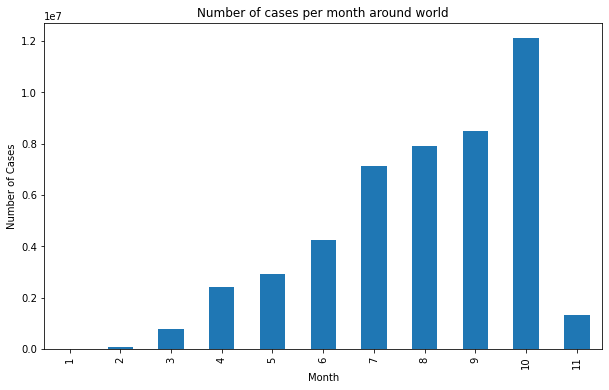

In [10]:
World.groupby(['Month']).sum()['Daily_Cases'].plot(title='Number of cases per month around world'
                                                   ,figsize=(10,6),kind='bar', ylabel='Number of Cases')
plt.show()

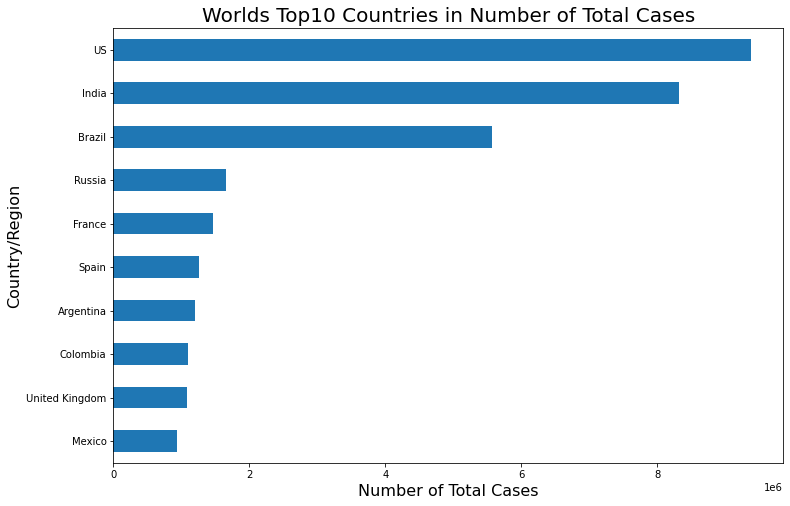

In [11]:
plt.title('Worlds Top10 Countries in Number of Total Cases',fontdict={'fontsize':20})
plt.xlabel('Number of Total Cases',fontdict={'fontsize':16})
plt.ylabel('Country/Region',fontdict={'fontsize':16})
df.groupby('Country/Region').sum().iloc[:,2:]['11/3/20'].sort_values().iloc[-10:].plot(kind='barh', figsize=(12,8))
plt.show()

### 4. Data Preprocessing

In [12]:
X = World['Date'].map(datetime.datetime.toordinal)
X = X.values.reshape(-1,1)

In [13]:
y = World['Daily_Cases'].values.reshape(-1, 1)

In [14]:
Scaler_X = StandardScaler()
Scaler_y = StandardScaler()

Scaled_X = Scaler_X.fit_transform(X)
Scaled_y = Scaler_y.fit_transform(y)

In [15]:
First_date_to_predict = '04/11/20'
Last_date_to_predict = '31/12/20'

First_date_to_predict = datetime.datetime.strptime(First_date_to_predict, '%d/%m/%y')
Last_date_to_predict = datetime.datetime.strptime(Last_date_to_predict, '%d/%m/%y')
#First_date_to_predict = datetime.datetime.toordinal(First_date_to_predict.astype(datetime))
#Last_date_to_predict = datetime.datetime.toordinal(datetime.datetime(Last_date_to_predict))

Dates_to_predict = [i for i in range(First_date_to_predict.toordinal(), Last_date_to_predict.toordinal()+1)]
#Dates_to_predict

In [16]:
datetime.date.fromordinal(Dates_to_predict[-1])

datetime.date(2020, 12, 31)

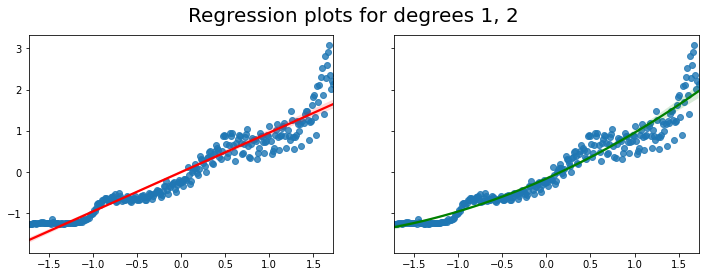

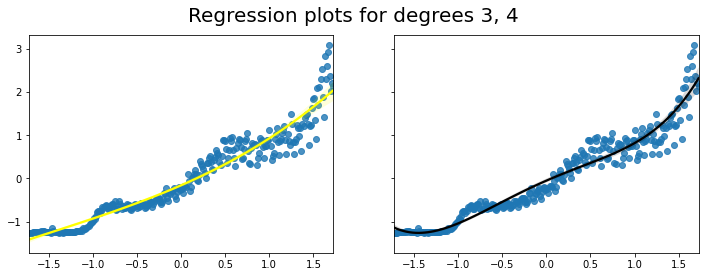

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Regression plots for degrees 1, 2', fontsize=20)
sns.regplot(ax=axes[0],x=Scaled_X,y=Scaled_y, order=1,line_kws={"color": "red"})
sns.regplot(ax=axes[1],x=Scaled_X,y=Scaled_y,order=2,line_kws={"color": "green"})
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Regression plots for degrees 3, 4', fontsize=20)
sns.regplot(ax=axes[0],x=Scaled_X,y=Scaled_y,order=3,line_kws={"color": "yellow"})
sns.regplot(ax=axes[1],x=Scaled_X,y=Scaled_y,order=4,line_kws={"color": "black"})
plt.show()

### 5. Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(Scaled_X, Scaled_y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

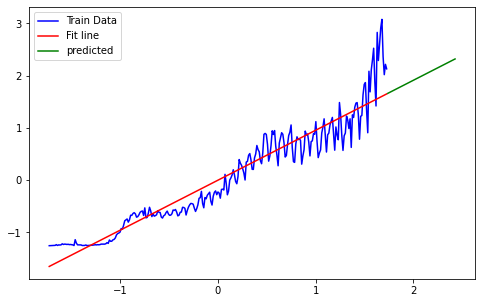

In [19]:
plt.figure(figsize=(8,5))
plt.plot(Scaled_X,Scaled_y,color ='blue', label='Train Data')
plt.plot(Scaled_X, lr.predict(Scaled_X), color = 'red', label='Fit line')
plt.plot(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1)), lr.predict(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1))), color = 'green', label='predicted')
plt.legend()
plt.show()

In [20]:
print('Mean Squared Error: ',mean_squared_error(Scaled_y, lr.predict(Scaled_X)))
print('Mean Absolute Error: ',mean_absolute_error(Scaled_y, lr.predict(Scaled_X)))

Mean Squared Error:  0.08631793152734449
Mean Absolute Error:  0.21371666804812


### 6. Support Vector Regressor using RBF kernel

In [21]:
regressor_rbf = SVR(kernel='rbf',C=10)
regressor_rbf.fit(Scaled_X, Scaled_y.ravel())

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

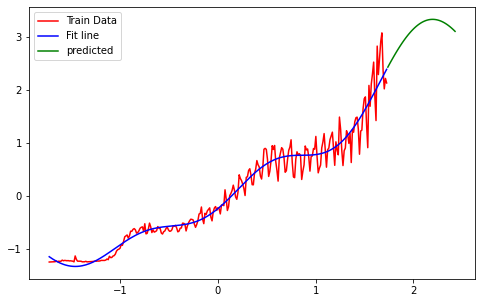

In [22]:
plt.figure(figsize=(8,5))
plt.plot(Scaled_X,Scaled_y,color ='red', label='Train Data')
plt.plot(Scaled_X, regressor_rbf.predict(Scaled_X), color = 'blue', label='Fit line')
plt.plot(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1)), regressor_rbf.predict(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1))), color = 'green', label='predicted')
plt.legend()
plt.show()

In [23]:
print('Mean Squared Error: ',mean_squared_error(Scaled_y, regressor_rbf.predict(Scaled_X)))
print('Mean Absolute Error: ',mean_absolute_error(Scaled_y, regressor_rbf.predict(Scaled_X)))

Mean Squared Error:  0.03709687451510834
Mean Absolute Error:  0.13152950070036654


### 7. Support Vector Regressor using poly kernel

In [24]:
regressor_poly = SVR(kernel='poly')
regressor_poly.fit(Scaled_X, Scaled_y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

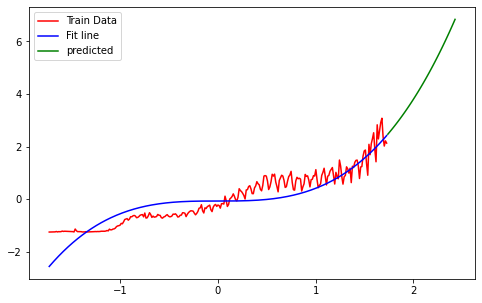

In [25]:
plt.figure(figsize=(8,5))
plt.plot(Scaled_X,Scaled_y,color ='red', label='Train Data')
plt.plot(Scaled_X, regressor_poly.predict(Scaled_X), color = 'blue', label='Fit line')
plt.plot(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1)), regressor_poly.predict(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1))), color = 'green', label='predicted')
plt.legend()
plt.show()

In [26]:
print('Mean Squared Error: ',mean_squared_error(Scaled_y, regressor_poly.predict(Scaled_X)))
print('Mean Absolute Error: ',mean_absolute_error(Scaled_y, regressor_poly.predict(Scaled_X)))

Mean Squared Error:  0.22152552793753977
Mean Absolute Error:  0.4012523804938559


### 8. Showing predictions for December

In [27]:
Linear_Date = [] ; Linear_cases = []
Rbf_Date = [] ; Rbf_cases = []
Poly_Date = [] ; Poly_cases = []

for j,i in enumerate(Dates_to_predict[27:]):
    x = lr.predict(np.array(Scaler_X.transform([[i]])))
    Linear_Date.append(datetime.date.fromordinal(i))
    Linear_cases.append(Scaler_y.inverse_transform(x)[0])
    
    y = regressor_rbf.predict(np.array(Scaler_X.transform([[i]])))
    Rbf_Date.append(datetime.date.fromordinal(i))
    Rbf_cases.append(Scaler_y.inverse_transform(y)[0])
    
    z = regressor_poly.predict(np.array(Scaler_X.transform([[i]])))
    Poly_Date.append(datetime.date.fromordinal(i))
    Poly_cases.append(Scaler_y.inverse_transform(z)[0])
    

##### Linear Regression predictions

In [28]:
pd.set_option('display.float_format', '{:.0f}'.format)
predicted_df_lr = pd.DataFrame(list(zip(Linear_Date, Linear_cases)), columns=['Date','Predicted Cases Number'])
predicted_df_lr

,Date,Predicted Cases Number
0,2020-12-01,425253
1,2020-12-02,426774
2,2020-12-03,428295
3,2020-12-04,429816
4,2020-12-05,431337
5,2020-12-06,432858
6,2020-12-07,434378
7,2020-12-08,435899
8,2020-12-09,437420
9,2020-12-10,438941


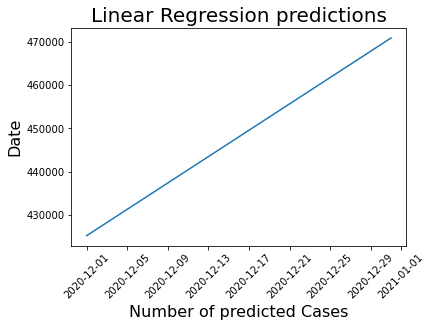

In [29]:
plt.plot(Linear_Date, Linear_cases)
plt.title('Linear Regression predictions', fontdict={'fontsize':20})
plt.xlabel('Number of predicted Cases',fontdict={'fontsize':16})
plt.ylabel('Date',fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

##### RBF Regression predictions

In [30]:
#pd.set_option('display.float_format', '{:.0f}'.format)
predicted_df_rbf = pd.DataFrame(list(zip(Rbf_Date, Rbf_cases)), columns=['Date','Predicted Cases Number'])
predicted_df_rbf

,Date,Predicted Cases Number
0,2020-12-01,593505
1,2020-12-02,595409
2,2020-12-03,597134
3,2020-12-04,598678
4,2020-12-05,600040
5,2020-12-06,601219
6,2020-12-07,602215
7,2020-12-08,603028
8,2020-12-09,603659
9,2020-12-10,604107


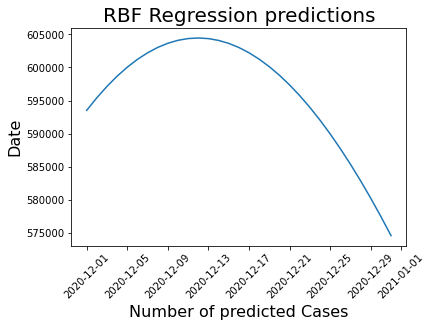

In [31]:
plt.plot(Rbf_Date, Rbf_cases)
plt.title('RBF Regression predictions', fontdict={'fontsize':20})
plt.xlabel('Number of predicted Cases',fontdict={'fontsize':16})
plt.ylabel('Date',fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

##### Poly Regression predictions

In [32]:
#pd.set_option('display.float_format', '{:.0f}'.format)
predicted_df_rbf = pd.DataFrame(list(zip(Poly_Date, Poly_cases)), columns=['Date','Predicted Cases Number'])
predicted_df_rbf

,Date,Predicted Cases Number
0,2020-12-01,716558
1,2020-12-02,726459
2,2020-12-03,736475
3,2020-12-04,746607
4,2020-12-05,756857
5,2020-12-06,767225
6,2020-12-07,777711
7,2020-12-08,788316
8,2020-12-09,799041
9,2020-12-10,809886


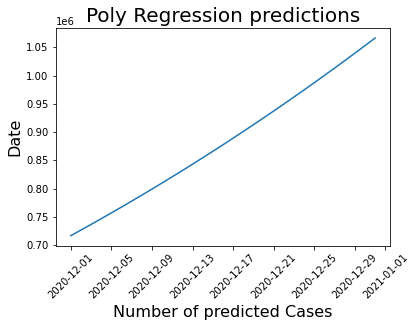

In [33]:
plt.plot(Poly_Date, Poly_cases)
plt.title('Poly Regression predictions', fontdict={'fontsize':20})
plt.xlabel('Number of predicted Cases',fontdict={'fontsize':16})
plt.ylabel('Date',fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

## B. Jordan cases analysis and predection

### 1. Data Manipulation

#### Getting the total number of cases in Jordan every day

In [34]:
Jordan = df[df['Country/Region']=='Jordan'].copy()
Jordan.drop(['Province/State','Country/Region','Lat','Long'],axis='columns',inplace=True)
Jordan = Jordan.transpose().reset_index()

#### Renaming the columns of the dataframe to (Date, Total_Cases)

In [35]:
Jordan.columns = ['Date', 'Total_Cases']

In [36]:
Jordan

,Date,Total_Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
282,10/30/20,69306
283,10/31/20,72607
284,11/1/20,75866
285,11/2/20,81743


#### Converting the Date column to datetime type

In [37]:
Jordan.Date = pd.to_datetime(Jordan.Date)

#### Getting the daily cases

In [38]:
Jordan['Daily_Cases'] = Jordan['Total_Cases'].diff()
Jordan['Daily_Cases'].fillna(0, inplace=True)
Jordan

,Date,Total_Cases,Daily_Cases
0,2020-01-22,0,0
1,2020-01-23,0,0
2,2020-01-24,0,0
3,2020-01-25,0,0
4,2020-01-26,0,0
...,...,...,...
282,2020-10-30,69306,3921
283,2020-10-31,72607,3301
284,2020-11-01,75866,3259
285,2020-11-02,81743,5877


#### Getting the month as new column from Date column

In [39]:
Jordan['Month'] = Jordan['Date'].astype('str').str[5:7]
Jordan['Month'] = Jordan['Month'].astype('int32')
#Jordan.head(60)

#### Dropping the first 52 days which has no cases

In [40]:
To_drop = [i for i in range(53)]
Jordan = Jordan.drop(index=To_drop).reset_index().drop('index',axis='columns')
Jordan

,Date,Total_Cases,Daily_Cases,Month
0,2020-03-15,8,7,3
1,2020-03-16,17,9,3
2,2020-03-17,34,17,3
3,2020-03-18,52,18,3
4,2020-03-19,69,17,3
...,...,...,...,...
229,2020-10-30,69306,3921,10
230,2020-10-31,72607,3301,10
231,2020-11-01,75866,3259,11
232,2020-11-02,81743,5877,11


### 2. Plotting

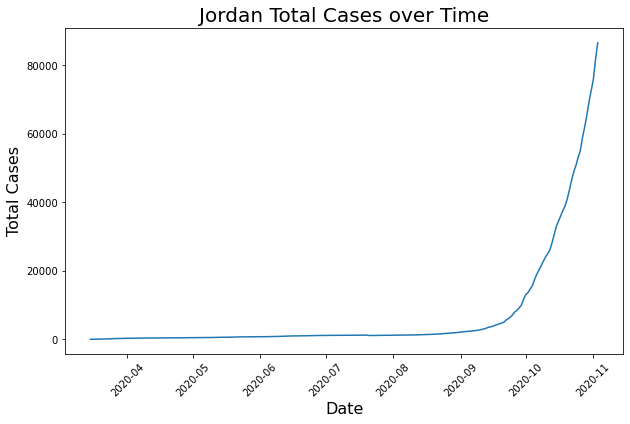

In [41]:
plt.figure(figsize=(10,6))
plt.plot(Jordan.Date, Jordan.Total_Cases)
plt.xticks(rotation=45)
plt.xlabel('Date',fontdict={'fontsize':16})
plt.ylabel('Total Cases',fontdict={'fontsize':16})
plt.title('Jordan Total Cases over Time',fontdict={'fontsize':20})
plt.show()

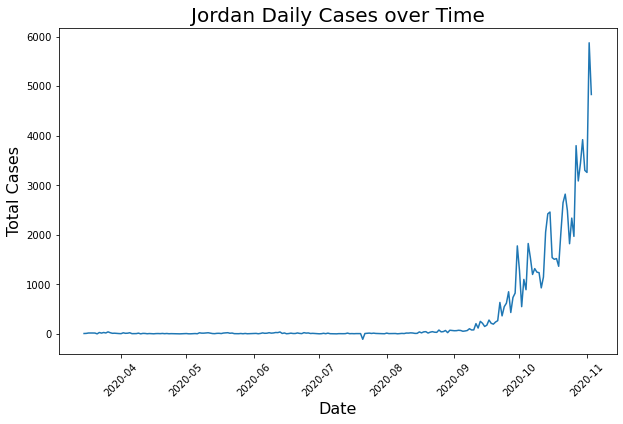

In [42]:
plt.figure(figsize=(10,6))
plt.plot(Jordan.Date, Jordan.Daily_Cases)
plt.xticks(rotation=45)
plt.xlabel('Date',fontdict={'fontsize':16})
plt.ylabel('Total Cases',fontdict={'fontsize':16})
plt.title('Jordan Daily Cases over Time',fontdict={'fontsize':20})
plt.show()

#### Replacing the negative value with zero

In [43]:
Jordan[Jordan['Daily_Cases']<0]['Daily_Cases'].index[0]

128

In [44]:
Jordan.iloc[Jordan[Jordan['Daily_Cases']<0]['Daily_Cases'].index[0],2] = 0

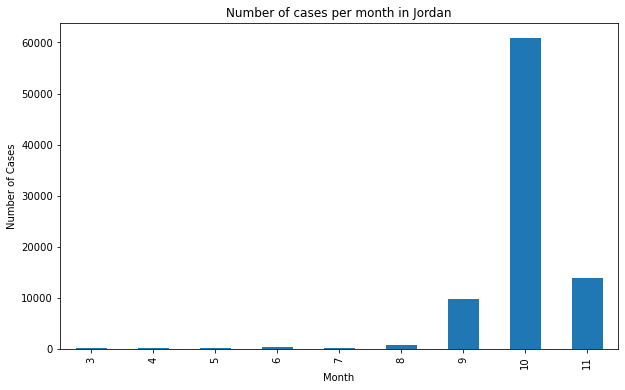

In [45]:
Jordan.groupby(['Month']).sum()['Daily_Cases'].plot(title='Number of cases per month in Jordan'
                                                   ,figsize=(10,6),kind='bar', ylabel='Number of Cases')
plt.show()

### 3. Data Preprocessing

In [46]:
X = Jordan['Date'].map(datetime.datetime.toordinal)
X = X.values.reshape(-1,1)

In [47]:
y = Jordan['Daily_Cases'].values.reshape(-1, 1)

In [48]:
Scaler_X = StandardScaler()
Scaler_y = StandardScaler()

Scaled_X = Scaler_X.fit_transform(X)
Scaled_y = Scaler_y.fit_transform(y)

In [49]:
First_date_to_predict = '04/11/20'
Last_date_to_predict = '31/12/20'

First_date_to_predict = datetime.datetime.strptime(First_date_to_predict, '%d/%m/%y')
Last_date_to_predict = datetime.datetime.strptime(Last_date_to_predict, '%d/%m/%y')

Dates_to_predict = [i for i in range(First_date_to_predict.toordinal(), Last_date_to_predict.toordinal()+1)]
#Dates_to_predict

In [50]:
datetime.date.fromordinal(Dates_to_predict[-1])

datetime.date(2020, 12, 31)

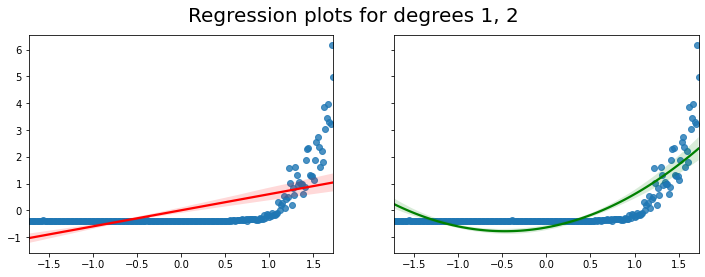

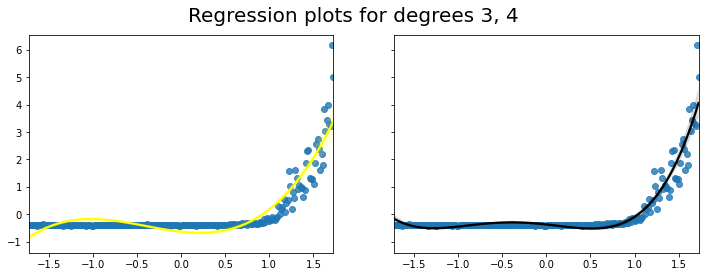

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Regression plots for degrees 1, 2', fontsize=20)
sns.regplot(ax=axes[0],x=Scaled_X,y=Scaled_y, order=1,line_kws={"color": "red"})
sns.regplot(ax=axes[1],x=Scaled_X,y=Scaled_y,order=2,line_kws={"color": "green"})
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Regression plots for degrees 3, 4', fontsize=20)
sns.regplot(ax=axes[0],x=Scaled_X,y=Scaled_y,order=3,line_kws={"color": "yellow"})
sns.regplot(ax=axes[1],x=Scaled_X,y=Scaled_y,order=4,line_kws={"color": "black"})
plt.show()

### 4. Linear Regression

In [52]:
lr = LinearRegression()
lr.fit(Scaled_X, Scaled_y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

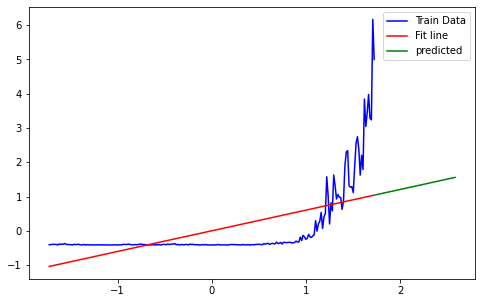

In [53]:
plt.figure(figsize=(8,5))
plt.plot(Scaled_X,Scaled_y,color ='blue', label='Train Data')
plt.plot(Scaled_X, lr.predict(Scaled_X), color = 'red', label='Fit line')
plt.plot(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1)), lr.predict(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1))), color = 'green', label='predicted')
plt.legend()
plt.show()

In [54]:
print('Mean Squared Error: ',mean_squared_error(Scaled_y, lr.predict(Scaled_X)))
print('Mean Absolute Error: ',mean_absolute_error(Scaled_y, lr.predict(Scaled_X)))

Mean Squared Error:  0.6366625734004077
Mean Absolute Error:  0.5472938335130534


### 5. Support Vector Regressor using RBF kernel

In [55]:
regressor_rbf = SVR(C=20, kernel='rbf')
regressor_rbf.fit(Scaled_X, Scaled_y.ravel())

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

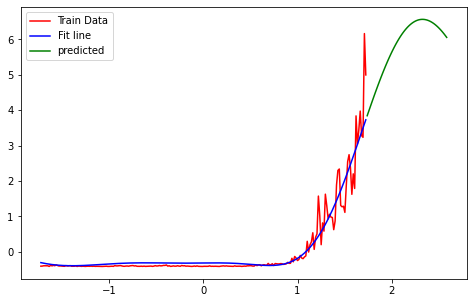

In [56]:
plt.figure(figsize=(8,5))
plt.plot(Scaled_X,Scaled_y,color ='red', label='Train Data')
plt.plot(Scaled_X, regressor_rbf.predict(Scaled_X), color = 'blue', label='Fit line')
plt.plot(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1)), regressor_rbf.predict(Scaler_X.transform(np.array(Dates_to_predict).reshape(-1,1))), color = 'green', label='predicted')
plt.legend()
plt.show()

In [57]:
print('Mean Squared Error: ',mean_squared_error(Scaled_y, regressor_rbf.predict(Scaled_X)))
print('Mean Absolute Error: ',mean_absolute_error(Scaled_y, regressor_rbf.predict(Scaled_X)))

Mean Squared Error:  0.08419649519269029
Mean Absolute Error:  0.1368967384283517


### 6. Showing predictions for December

In [58]:
Linear_Date = [] ; Linear_cases = []
Rbf_Date = [] ; Rbf_cases = []

for j,i in enumerate(Dates_to_predict[27:]):
    x = lr.predict(np.array(Scaler_X.transform([[i]])))
    Linear_Date.append(datetime.date.fromordinal(i))
    Linear_cases.append(Scaler_y.inverse_transform(x)[0])
    
    y = regressor_rbf.predict(np.array(Scaler_X.transform([[i]])))
    Rbf_Date.append(datetime.date.fromordinal(i))
    Rbf_cases.append(Scaler_y.inverse_transform(y)[0])

##### Linear Regression predictions

In [59]:
pd.set_option('display.float_format', '{:.0f}'.format)
predicted_df_lr = pd.DataFrame(list(zip(Linear_Date, Linear_cases)), columns=['Date','Predicted Cases Number'])
predicted_df_lr

,Date,Predicted Cases Number
0,2020-12-01,1522
1,2020-12-02,1530
2,2020-12-03,1538
3,2020-12-04,1546
4,2020-12-05,1554
5,2020-12-06,1562
6,2020-12-07,1570
7,2020-12-08,1578
8,2020-12-09,1586
9,2020-12-10,1593


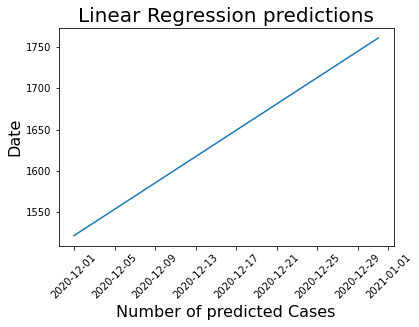

In [60]:
plt.plot(Linear_Date, Linear_cases)
plt.title('Linear Regression predictions', fontdict={'fontsize':20})
plt.xlabel('Number of predicted Cases',fontdict={'fontsize':16})
plt.ylabel('Date',fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

##### RBF Regression predictions

In [61]:
#pd.set_option('display.float_format', '{:.0f}'.format)
predicted_df_rbf = pd.DataFrame(list(zip(Rbf_Date, Rbf_cases)), columns=['Date','Predicted Cases Number'])
predicted_df_rbf

,Date,Predicted Cases Number
0,2020-12-01,5960
1,2020-12-02,6002
2,2020-12-03,6040
3,2020-12-04,6076
4,2020-12-05,6107
5,2020-12-06,6136
6,2020-12-07,6160
7,2020-12-08,6181
8,2020-12-09,6199
9,2020-12-10,6213


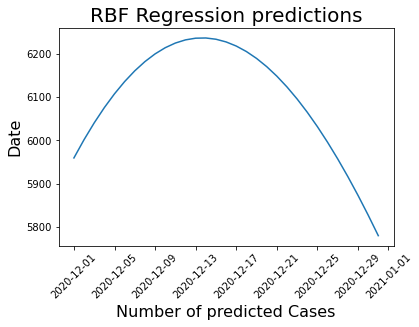

In [62]:
plt.plot(Rbf_Date, Rbf_cases)
plt.title('RBF Regression predictions', fontdict={'fontsize':20})
plt.xlabel('Number of predicted Cases',fontdict={'fontsize':16})
plt.ylabel('Date',fontdict={'fontsize':16})
plt.xticks(rotation=45)
plt.show()

## Conclusion

As we saw in the results of metrics (MSE and MAE), the best model for world cases was (SVR with RBF Kernel). However, the predictions closer to reality were more evident in the (SVR with Poly Kernel) due to the continuous increase in cases exponentially in the last days. While for the Linear Regression model, it performed well based on metrics.

For Jordan, data increases exponentially in the last period, but before that, the curve is rather flat and thus this makes it difficult to find a better fit curve. The Linear Regression model gave very poor results based on MSE and MAE metrics, and was unreliable in predicting. While for (SVR with RBF Kernel) it gave much better results and somewhat simulates reality of cases increasing.
